In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from plantcv import plantcv as pcv

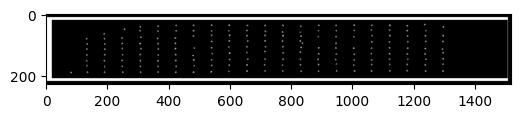

True

In [31]:
image = cv2.imread('./contours.jpeg', 0)
thresh = image.copy()
thresh[thresh < 50] = 0
thresh[thresh >= 50] = 255
plt.imshow(thresh, cmap='gray')
plt.show()
cv2.imwrite('./contours.png', thresh)


In [32]:
class options:
    def __init__(self):
        self.image = "./contours.png"
        self.debug = "plot"
        self.writeimg= False 
        self.result = "multi_plant_tutorial_results.json"
        self.outdir = "." # Store the output to the current directory 

# Get options
args = options()
pcv.params.debug = args.debug

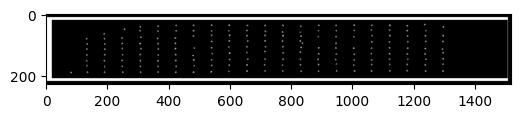

In [33]:
img, path, filename = pcv.readimage(filename=args.image)

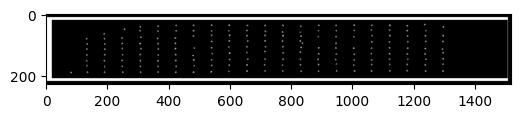

In [34]:
shift1 = pcv.shift_img(img=img, number=1, side='top')
img1 = shift1

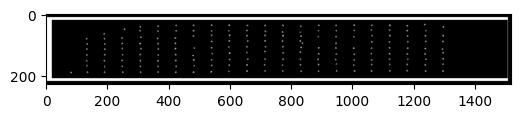

In [36]:
img_binary = pcv.threshold.binary(gray_img=img1, threshold=10, max_value=255, object_type='light')

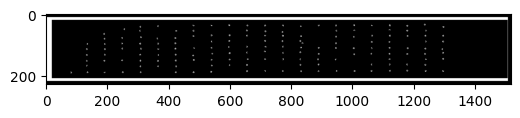

In [37]:
fill_image = pcv.fill(bin_img=img_binary, size=10)

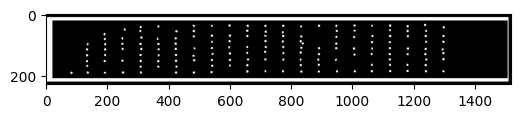

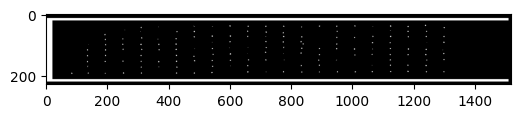

True

In [72]:
dilated = pcv.dilate(gray_img=fill_image, ksize=2, i=2)
eroded = pcv.erode(gray_img=dilated, ksize=2, i=3)
eroded[eroded == 255] = 10
eroded[eroded == 0] = 255
eroded[eroded == 10] = 0
r, c = eroded.shape
crop = 25
eroded = eroded[crop:r-crop, crop:c-crop]
cv2.imwrite('./dilated.png', eroded)

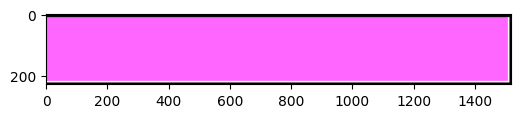

In [57]:
id_objects, obj_hierarchy = pcv.find_objects(img=dilated, mask=img1)

In [ ]:
clusters_i, contours, hierarchies = pcv.cluster_contours(img=img1, roi_objects=roi_objects, 
                                                         roi_obj_hierarchy=roi_obj_hierarchy, 
                                                         nrow=4, ncol=1, 
                                                         show_grid=True)